What is the best design for a barrel in order to maximize its volume?  
  
This problem is non-linear optimization problem,  
because the objective function is in the non-linear form we can also see that here we do need any constraints,  
so it makes this problem a problem of maximizing a cubic function  
meaning we can simply calculate derivative of this function, equate it to zero and and get a solution

![alt text](barrel.jpg)

see more info about Kepler's problem:
https://www.matematicasvisuales.com/loci/kepler/doliometry.html#keplerbarrel
https://maa.org/press/periodicals/convergence/kepler-the-volume-of-a-wine-barrel-introduction

In [2]:
import xpress as xp
from math import pi as PI

Let's create decision variables:  
reference to xpress doc:  
https://www.fico.com/fico-xpress-optimization/docs/latest/solver/optimizer/python/HTML/xpress_var.html

In [3]:
h = xp.var(vartype=xp.continuous, name='h')
d = xp.var(vartype=xp.continuous, name='d')

Define problem   
reference to xpress doc:  
https://www.fico.com/fico-xpress-optimization/docs/latest/solver/optimizer/python/HTML/xpress.problem.html

In [4]:
p = xp.problem()

Using the Community license in this session. If you have a full Xpress license, pass the full path to your license file to xpress.init(). If you want to use the FICO Community license and no longer want to see this message, use the following code before using the xpress module:
  xpress.init('c:/Users/szymczak.a.4/AppData/Local/Programs/Python/Python311/Lib/site-packages/xpress/license/community-xpauth.xpr')


Add decision variables to a defined problem object  
reference to xpress doc:  
https://www.fico.com/fico-xpress-optimization/docs/latest/solver/optimizer/HTML/xprs.net/html/a2752b18-4ef0-ada9-9a00-142235f685cb.htm

In [5]:
p.addVariable(h)
p.addVariable(d)

Create a constraint specifying that the variable d should be a constant value  
reference to xpress doc:  
https://www.fico.com/fico-xpress-optimization/docs/latest/solver/optimizer/python/HTML/problem.addConstraint.html

In [6]:
p.addConstraint(d == 1)

Set Objective function  
reference to xpress doc:  
https://www.fico.com/fico-xpress-optimization/docs/latest/solver/optimizer/HTML/xprs.net/html/cc330fad-1aa9-65a9-7603-2fc1a20c6cdd.htm

In [9]:
p.setObjective((PI * h * d**2) / 4 - (PI * h**3) / 16, sense=xp.maximize)

Finally solve : D

In [10]:
p.optimize()

Original problem size
   linear:    2 rows, 3 columns, 2 linear coefficients
   nonlinear: 1 coefficients, 19 tokens
Nonlinear presolve
   compressing formula space (in use\total : 20\61)
   removed 2 formulas and 40 formula tokens
   linear row reductions removed 1 rows, 0 columns, 1 linear coefficients
   removed 1 fixed variables from formulas
   simplify removed 4 tokens
   objective transfer row objtransferrow through variable objtransfercol
Presolved problem size
   linear:    1 rows, 4 columns, 1 linear coefficients
   nonlinear: 1 coefficients, 15 tokens
Problem is nonlinear presolved
FICO Xpress v9.3.0, Community, solve started 0:03:11, Jun 11, 2024
Control settings used:
OUTPUTLOG = 1
NLPPOSTSOLVE = 1
XSLP_DELETIONCONTROL = 0
XSLP_OBJSENSE = -1
Maximum expanded nl-formula size: 15  (row 'objtransferrow')
Total tokens: 15
  8  parallel calculation threads
  Jacobian: symbolic differentiation
           1 base AD formula, 14 average complexity
           1 in the Jacobian, 13 a

(<SolveStatus.COMPLETED: 3>, <SolStatus.FEASIBLE: 2>)

Read the solution

In [11]:
print("Optimal height (h):", p.getSolution()[0])
print("Optimal diameter (r):", (p.getSolution()[1]/2) - (p.getSolution()[0]/4))
print("Optimal volume:", (p.getObjVal()))

Optimal height (h): 1.15625
Optimal diameter (r): 0.2109375
Optimal volume: 0.6045981543627864


Visualisation part  
________________________________________________________________________________________________


In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
h = p.getSolution()[0]
r = (p.getSolution()[1]/2) - (p.getSolution()[0]/4)
v = p.getSolution()[2]

Plot a function that describes height-volume relationship

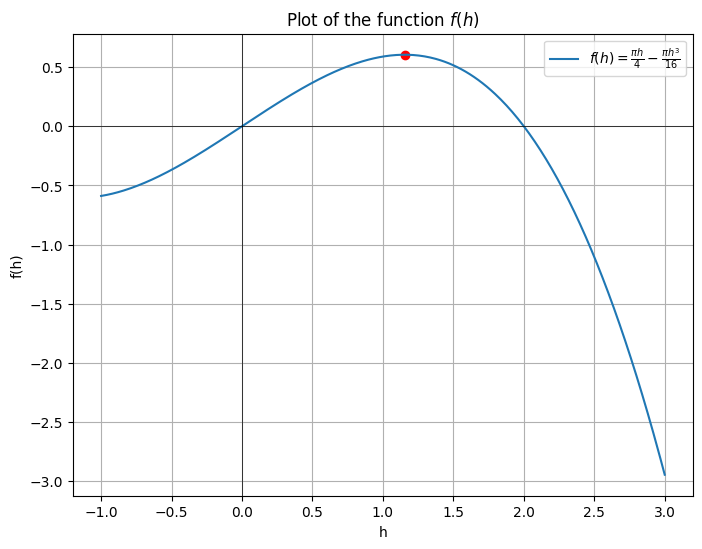

In [34]:
def func(h):
    #we assume d is constant and d=1 but i could be any positive value
    return (np.pi * h) / 4 - (np.pi * h**3) / 16

h_values = np.linspace(-1, 3, 400)

y = func(h_values)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(h_values, y, label=r'$f(h) = \frac{\pi h}{4} - \frac{\pi h^3}{16}$')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Plot of the function $f(h)$')
plt.xlabel('h')
plt.ylabel('f(h)')
plt.legend()
plt.grid(True)
plt.scatter(h, v, color='red', label='Point')


Plot a calculated cylinder

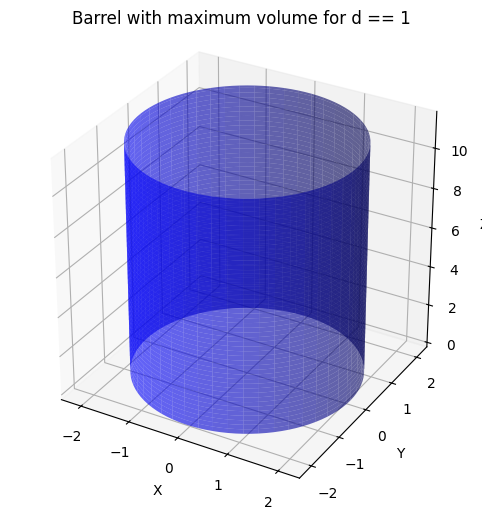

In [13]:
z = np.linspace(0, h, 100)
theta = np.linspace(0, 2 * np.pi, 100)
theta_grid, z_grid = np.meshgrid(theta, z)
x_grid = r * np.cos(theta_grid)
y_grid = r * np.sin(theta_grid)

# Plotting the cylinder
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid, color='b', alpha=0.6)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Barrel with maximum volume for d = 1')

ax.set_box_aspect([1, 1, 1])

plt.show()